In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('./resources/preprocessed.json')
summed_scores = pd.read_json('./resources/summed_scores.json')

In [3]:
df['sentiment score'] = summed_scores['sentiment score'].values

In [4]:
df[abs(df['rating'].values - df['sentiment score'].values) > 5].to_csv('./resources/suspicious_reviews.csv')

In [5]:
sus = pd.read_json('./resources/suspicious_reviews.json')

In [6]:
sus['rating'].value_counts(sort=True)

0     3141
10    2474
1      495
9      211
2      114
8       87
3       45
7       31
4        6
6        4
Name: rating, dtype: int64

In [7]:
sus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6608 entries, 9 to 80601
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             6608 non-null   object        
 1   date             6608 non-null   datetime64[ns]
 2   rating           6608 non-null   int64         
 3   review           6608 non-null   object        
 4   thumbs up        6608 non-null   int64         
 5   total thumbs     6608 non-null   int64         
 6   thumbs down      6608 non-null   int64         
 7   sentiment score  6608 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 464.6+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52517 entries, 0 to 80602
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             52517 non-null  object        
 1   date             52517 non-null  datetime64[ns]
 2   rating           52517 non-null  int64         
 3   review           52517 non-null  object        
 4   thumbs up        52517 non-null  int64         
 5   total thumbs     52517 non-null  int64         
 6   thumbs down      52517 non-null  int64         
 7   sentiment score  52517 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.6+ MB


In [9]:
sus2 = df[abs(df['rating'].values - df['sentiment score'].values) > 4.4]

In [10]:
sus2['rating'].value_counts(sort=True)

0     4755
10    4229
1      808
9      394
2      174
8      140
3       85
7       61
4       28
6       19
5        9
Name: rating, dtype: int64

In [11]:
df['rating'].values.mean()

5.09244625549822

In [12]:
df['sentiment score'].values.mean()

5.128607066342921

In [13]:
index_list = list(sus2.index)
df = df.drop(index=index_list)

In [14]:
df['rating'].values.mean()

5.222408226712902

In [15]:
df['sentiment score'].values.mean()

5.10736706888806

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41815 entries, 0 to 80602
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             41815 non-null  object        
 1   date             41815 non-null  datetime64[ns]
 2   rating           41815 non-null  int64         
 3   review           41815 non-null  object        
 4   thumbs up        41815 non-null  int64         
 5   total thumbs     41815 non-null  int64         
 6   thumbs down      41815 non-null  int64         
 7   sentiment score  41815 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.9+ MB


In [17]:
sus_date = df[df['date'] == '2020-06-19']
sus_date['rating'].value_counts(sort=True)

0     1492
10     784
1      699
2      427
3      302
4      154
9       96
5       89
8       48
6       44
7       25
Name: rating, dtype: int64

In [18]:
sus_date2 = df[df['date'] == '2020-06-20']
sus_date2['rating'].value_counts(sort=True)

0     1414
10     848
1      576
2      276
3      250
4      137
9      125
5       97
8       51
6       46
7       39
Name: rating, dtype: int64

In [19]:
df = df[df['date'] != '2020-06-19'] 
df = df[df['date'] != '2020-06-20'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33796 entries, 2 to 80602
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             33796 non-null  object        
 1   date             33796 non-null  datetime64[ns]
 2   rating           33796 non-null  int64         
 3   review           33796 non-null  object        
 4   thumbs up        33796 non-null  int64         
 5   total thumbs     33796 non-null  int64         
 6   thumbs down      33796 non-null  int64         
 7   sentiment score  33796 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.3+ MB


In [20]:
df['rating'].values.mean()

5.67685524914191

In [21]:
df['sentiment score'].values.mean()

5.309681250594851

<AxesSubplot:title={'center':'Értékelések száma pontszámonként'}>

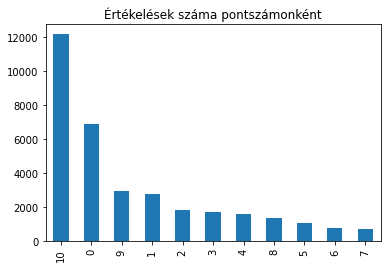

In [22]:
df['rating'].value_counts().plot(kind='bar', title='Értékelések száma pontszámonként')

<AxesSubplot:title={'center':'Értékelések száma pontszámonként'}>

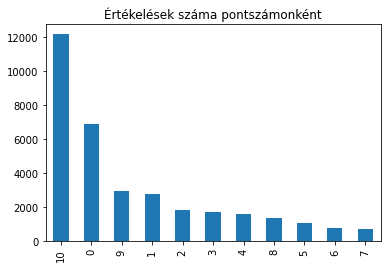

In [23]:
df['rating'].value_counts().plot(kind='bar', title='Értékelések száma pontszámonként')

In [25]:
trash = ['politics', 'gay', 'lesbian', 'asian', 'politic', 'muslim', 'political']

df_trash = df[df['review'].str.contains('|'.join(trash))]

In [26]:
df_trash['rating'].value_counts(sort=True)

0     521
1     213
10    124
2     120
3     105
4     103
9      66
8      48
5      45
7      33
6      30
Name: rating, dtype: int64

In [27]:
index_list = list(df_trash.index)
df = df.drop(index=index_list)

In [28]:
df['rating'].values.mean()

5.799092256391256

In [29]:
df['sentiment score'].values.mean()

5.367052541912526

<AxesSubplot:title={'center':'Értékelések száma pontszámonként'}>

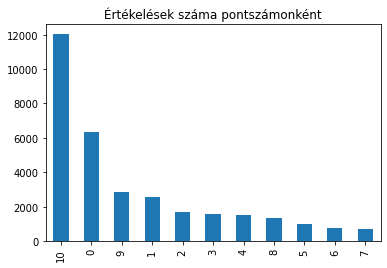

In [30]:
df['rating'].value_counts().plot(kind='bar', title='Értékelések száma pontszámonként')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32388 entries, 3 to 80602
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             32388 non-null  object        
 1   date             32388 non-null  datetime64[ns]
 2   rating           32388 non-null  int64         
 3   review           32388 non-null  object        
 4   thumbs up        32388 non-null  int64         
 5   total thumbs     32388 non-null  int64         
 6   thumbs down      32388 non-null  int64         
 7   sentiment score  32388 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.2+ MB


In [34]:
df['rating'].value_counts()

10    12032
0      6351
9      2855
1      2581
2      1700
3      1579
4      1504
8      1334
5      1006
6       752
7       694
Name: rating, dtype: int64

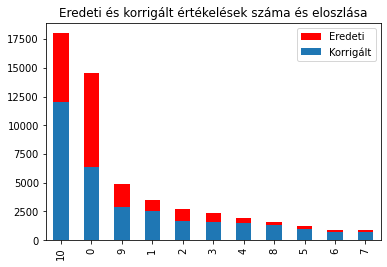

In [32]:
df_old = pd.read_json('./resources/preprocessed.json')

df_old['rating'].value_counts().plot(kind='bar', title='Eredeti és korrigált értékelések száma és eloszlása', color='red', label='Eredeti')
df['rating'].value_counts().plot(kind='bar', label='Korrigált')
plt.legend(loc='upper right')
plt.show()